<a href="https://colab.research.google.com/github/1607292/PostMessageExample/blob/master/getStock.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
!pip install yfinance
!pip install Backtesting
!pip install talib-binary

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 62 kB 1.2 MB/s 
  Attempting uninstall: requests
    Found existing installation: requests 2.23.0
    Uninstalling requests-2.23.0:
      Successfully uninstalled requests-2.23.0
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 175 kB 4.2 MB/s 
  Created wheel for Backtesting: filename=Backtesting-0.3.3-py3-none-any.whl size=173832 sha256=946d4b3c1edda73a07113a58af822456233583dd0e642a33a3b8f96476fb8013
  Stored in directory: /root/.cache/pip/wheels/48/1d/ea/65dacebc37da7655d8a1fd0f315ac39d102e31d6545237a1c6
Successfully built Backtesting
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     |████████████████████████████████| 2.4 MB 4.2 MB/s 


In [2]:
import yfinance as yf
import pandas as pd

def get_historical_data(ticker):
  d = yf.Ticker(ticker)
  df = d.history(period="max")
  df.columns = df.columns.str.lower()
  df.columns = pd.Series(df.columns).str.capitalize().values
  return df.dropna()

df = get_historical_data('2330.TW')
df

,Open,High,Low,Close,Volume,Dividends,Stock splits
Date,,,,,,,
2000-01-04,35.802345,35.802345,35.198940,35.802345,200662336736,0.0,0.0
2000-01-05,35.802331,36.606808,35.399997,36.606808,402466805912,0.0,0.0
2000-01-06,36.405751,36.606822,35.802345,35.802345,197545715802,0.0,0.0
2000-01-07,34.595525,35.198931,34.193191,34.796597,235270344752,0.0,0.0
2000-01-10,35.802335,36.204478,35.198930,36.003407,276171685539,0.0,0.0
...,...,...,...,...,...,...,...
2022-08-23,503.000000,506.000000,502.000000,504.000000,19191108,0.0,0.0
2022-08-24,504.000000,508.000000,503.000000,503.000000,14363212,0.0,0.0
2022-08-25,505.000000,510.000000,504.000000,508.000000,9357138,0.0,0.0


In [3]:
import talib

# compute simple moving average using talib
sma1 = talib.SMA(df.Close, timeperiod=20)
sma2 = talib.SMA(df.Close, timeperiod=60)

# compute buy and sell signals (golden cross and death cross)
signal_long = (sma1 > sma2) & (sma1.shift() < sma2.shift())
signal_short = (sma1 < sma2) & (sma1.shift() > sma2.shift())

# combine long and short signals
signal = signal_long.copy()
signal[signal_short] = -1

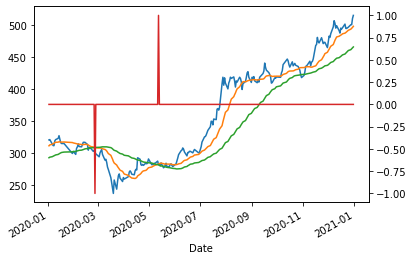

In [4]:
df.Close['2020'].plot()
sma1['2020'].plot()
sma2['2020'].plot()
signal['2020'].astype(int).plot(secondary_y=True)